In [26]:
# Data Wrangling
import pandas as pd
import numpy as np

# Visualisation
import matplotlib.pyplot as plt
import seaborn as sns

# Data Transformation
from sklearn.impute import SimpleImputer



In [27]:
# URL of the CSV file
url = 'https://raw.githubusercontent.com/redbackoperations/Projects/main/Sports%20Performance%20Analysis/frontend/Cycling%20Analysis/data/extended_activities.csv'

# Read the CSV file directly from the URL
df = pd.read_csv(url)

# Display the first 10 rows
df.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Gear,...,Maximum Power 10s,Maximum Power 30s,Maximum Power 1.0min,Maximum Power 5.0min,Maximum Power 10.0min,Maximum Power 20.0min,Maximum Power 30.0min,Maximum Power 1.0 hr,Maximum Power 1.5 hr,Maximum Power 2.0 hr
0,2929442069,"13 Dec 2019, 01:46:07",Lunch Ride,Ride,3859,22.97,139.0,11.0,False,NaN,...,412.9,342.1,221.2,162.2,136.3,120.8,109.8,105.4,0.0,0.0
1,2945780637,"20 Dec 2019, 23:05:01",Morning Ride,Ride,4852,29.65,133.0,12.0,False,NaN,...,342.1,236.1,184.3,150.6,131.4,122.1,120.3,115.6,0.0,0.0
2,2948028275,"21 Dec 2019, 23:25:29",Morning Ride,Ride,5817,32.38,139.0,19.0,False,NaN,...,390.5,265.1,213.3,146.2,135.1,127.5,125.5,110.2,104.7,0.0
3,2952462113,"24 Dec 2019, 01:19:17",Lunch Ride,Ride,3851,21.68,140.0,11.0,False,NaN,...,452.0,303.1,262.0,161.9,146.7,139.7,134.0,112.3,0.0,0.0
4,2956494096,"26 Dec 2019, 00:09:08",Lunch Ride,Ride,5843,32.36,131.0,14.0,False,NaN,...,342.9,243.9,208.3,134.7,124.0,119.4,115.5,99.8,96.9,0.0


In [28]:
# Isolate the running data component
df_run = df[df['Activity Type'] == 'Run']

df_run.head()

,Activity ID,Activity Date,Activity Name,Activity Type,Elapsed Time,Distance,Max Heart Rate,Relative Effort,Commute,Activity Gear,...,Maximum Power 10s,Maximum Power 30s,Maximum Power 1.0min,Maximum Power 5.0min,Maximum Power 10.0min,Maximum Power 20.0min,Maximum Power 30.0min,Maximum Power 1.0 hr,Maximum Power 1.5 hr,Maximum Power 2.0 hr
89,7057073739,"28 Apr 2022, 21:49:44",Morning Run,Run,4127,12.77,178.0,78.0,False,NaN,...,296.8,271.9,259.4,247.5,242.9,241.5,239.5,235.6,0.0,0.0
90,7067754767,"1 May 2022, 00:11:03",Morning Run,Run,7723,24.63,173.0,185.0,False,NaN,...,376.5,343.7,326.4,316.3,315.0,297.3,291.1,280.1,275.8,272.1
91,7073448977,"1 May 2022, 23:04:26",Morning Run,Run,4202,12.51,182.0,255.0,False,NaN,...,342.0,300.0,282.7,267.1,262.4,261.1,258.3,253.2,0.0,0.0
92,7083686840,"3 May 2022, 20:34:15",Morning Run,Run,4086,12.72,188.0,276.0,False,NaN,...,326.0,302.3,287.4,275.5,270.9,269.0,267.2,263.4,0.0,0.0
93,7094718079,"5 May 2022, 21:44:27",Morning Run,Run,4290,13.09,184.0,241.0,False,NaN,...,320.9,315.3,306.2,271.2,269.9,263.9,264.2,258.8,0.0,0.0


In [29]:
df_run.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 89 to 344
Data columns (total 49 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Activity ID                164 non-null    int64  
 1   Activity Date              164 non-null    object 
 2   Activity Name              164 non-null    object 
 3   Activity Type              164 non-null    object 
 4   Elapsed Time               164 non-null    int64  
 5   Distance                   164 non-null    float64
 6   Max Heart Rate             164 non-null    float64
 7   Relative Effort            164 non-null    float64
 8   Commute                    164 non-null    bool   
 9   Activity Gear              0 non-null      object 
 10  Filename                   164 non-null    object 
 11  Athlete Weight             0 non-null      float64
 12  Bike Weight                0 non-null      float64
 13  Moving Time                164 non-null    float64
 14

In [30]:
# Sum the total rows of missing values from each attribute
missing_values = df_run.isnull().sum()

# Return only attrbutes with missing values
missing_values[missing_values > 0]

Activity Gear                164
Athlete Weight               164
Bike Weight                  164
Elevation Loss                 1
Elevation Low                  1
Elevation High                 1
Average Temperature          155
Total Work                   147
Perceived Exertion           164
Prefer Perceived Exertion    164
Perceived Relative Effort    164
Grade Adjusted Distance        1
Total Steps                  156
dtype: int64

In [31]:
# Remove attributes where 50% or more data is missing
null_threshold = len(df_run) * 0.5
df_run_clean = df_run.dropna(thresh=null_threshold, axis=1)

c:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\himan\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

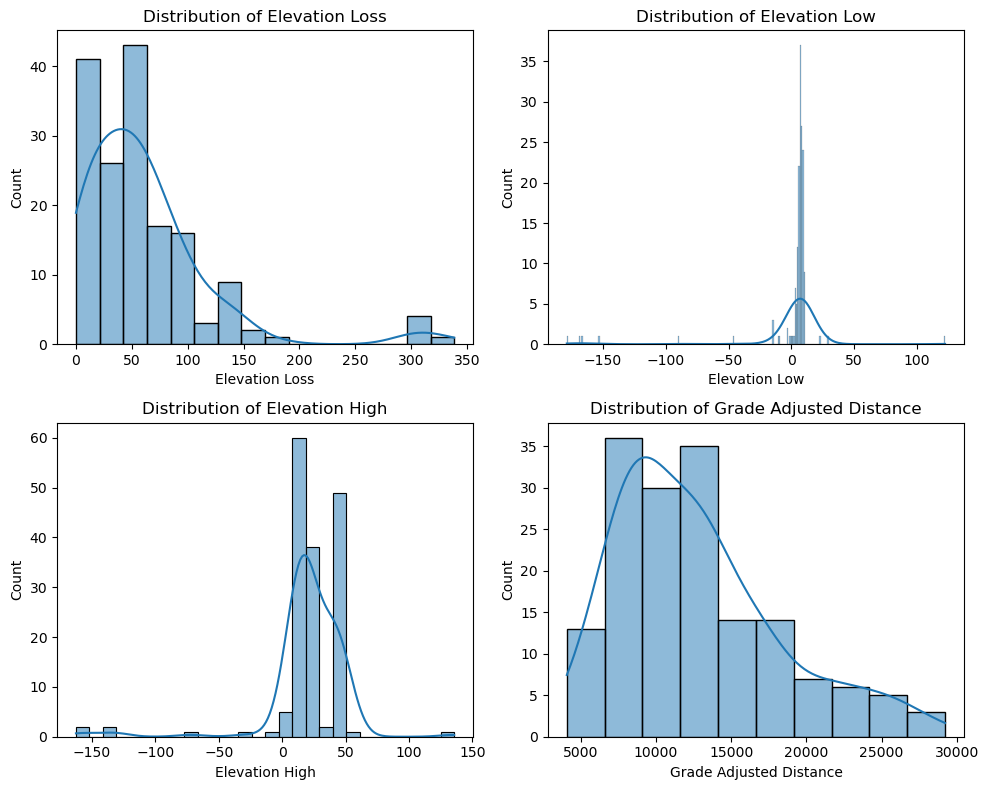

In [32]:
# Columns containing missing val less than 50% of attribute
missing_val_cols = df_run_clean.columns[(df_run_clean.isnull().mean() > 0) & (df_run_clean.isnull().mean() < 0.5)].tolist()

# Plot distributions of attributes less than 50%
plt.figure(figsize=(10,8))

for i, col in enumerate(missing_val_cols, 1):
    plt.subplot(2, 2, i)
    # Drop na for the purposes of the distribution analysis
    sns.histplot(df_run_clean[col].dropna(), kde=True)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel("Count")

plt.tight_layout()
plt.show()

In [33]:
imputer = SimpleImputer(strategy='median')
df_run_clean[missing_val_cols] = imputer.fit_transform(df_run_clean[missing_val_cols])

df_run_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 89 to 344
Data columns (total 40 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Activity ID              164 non-null    int64  
 1   Activity Date            164 non-null    object 
 2   Activity Name            164 non-null    object 
 3   Activity Type            164 non-null    object 
 4   Elapsed Time             164 non-null    int64  
 5   Distance                 164 non-null    float64
 6   Max Heart Rate           164 non-null    float64
 7   Relative Effort          164 non-null    float64
 8   Commute                  164 non-null    bool   
 9   Filename                 164 non-null    object 
 10  Moving Time              164 non-null    float64
 11  Max Speed                164 non-null    float64
 12  Average Speed            164 non-null    float64
 13  Elevation Gain           164 non-null    float64
 14  Elevation Loss           164 n

C:\Users\himan\AppData\Local\Temp\ipykernel_17552\102161449.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_run_clean[missing_val_cols] = imputer.fit_transform(df_run_clean[missing_val_cols])


In [34]:
df_run_clean['Activity Date'] = pd.to_datetime(df_run_clean['Activity Date'], format='%d %b %Y, %H:%M:%S')

# Preparing data for time series analysis
df_run_clean['Month'] = df_run_clean['Activity Date'].dt.month
df_run_clean['Weekday'] = df_run_clean['Activity Date'].dt.weekday
df_run_clean['Year'] = df_run_clean['Activity Date'].dt.year


# Average metrics by month
avg_metrics_month = df_run_clean.groupby('Month')[['Distance', 'Average Speed', 'Calories']].mean()

# Average metrics by weekday
avg_metrics_weekday = df_run_clean.groupby('Weekday')[['Distance', 'Average Speed', 'Calories']].mean()

C:\Users\himan\AppData\Local\Temp\ipykernel_17552\3166914951.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_run_clean['Activity Date'] = pd.to_datetime(df_run_clean['Activity Date'], format='%d %b %Y, %H:%M:%S')
C:\Users\himan\AppData\Local\Temp\ipykernel_17552\3166914951.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_run_clean['Month'] = df_run_clean['Activity Date'].dt.month
C:\Users\himan\AppData\Local\Temp\ipykernel_17552\3166914951.py:5: SettingWithCopyWarning: 
A value is trying to be 

In [35]:
df_run_clean.info()

<class 'pandas.core.frame.DataFrame'>
Index: 164 entries, 89 to 344
Data columns (total 43 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Activity ID              164 non-null    int64         
 1   Activity Date            164 non-null    datetime64[ns]
 2   Activity Name            164 non-null    object        
 3   Activity Type            164 non-null    object        
 4   Elapsed Time             164 non-null    int64         
 5   Distance                 164 non-null    float64       
 6   Max Heart Rate           164 non-null    float64       
 7   Relative Effort          164 non-null    float64       
 8   Commute                  164 non-null    bool          
 9   Filename                 164 non-null    object        
 10  Moving Time              164 non-null    float64       
 11  Max Speed                164 non-null    float64       
 12  Average Speed            164 non-null   

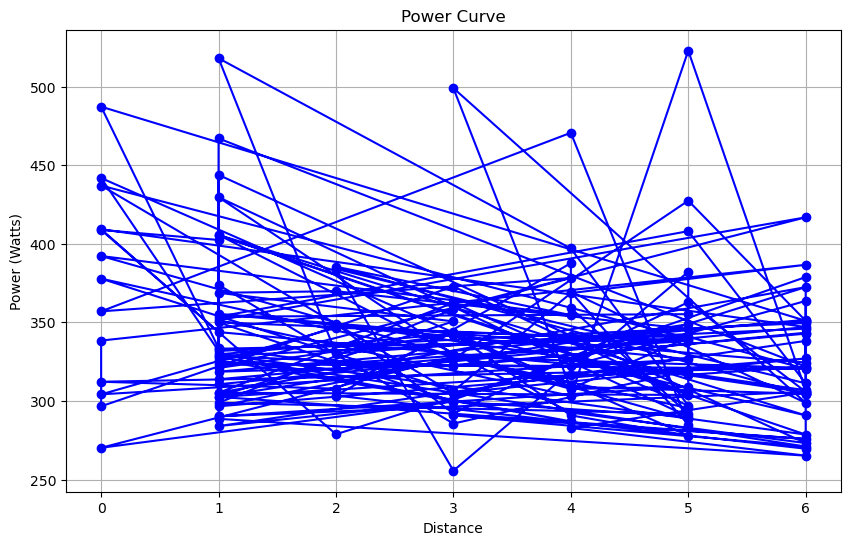

In [36]:
import matplotlib.pyplot as plt

# Choose the variable to represent time or distance
# For example, let's use 'Distance'
x = df_run_clean['Weekday']  
# Choose the power variable to plot
# For example, let's use 'Maximum Power 1.0 hr'
y = df_run_clean['Maximum Power 5s']  # Assuming 'Maximum Power 1.0 hr' is the column name representing power

# Plot the power curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue', marker='o', linestyle='-')
plt.title('Power Curve')
plt.xlabel('Distance')
plt.ylabel('Power (Watts)')
plt.grid(True)
plt.show()


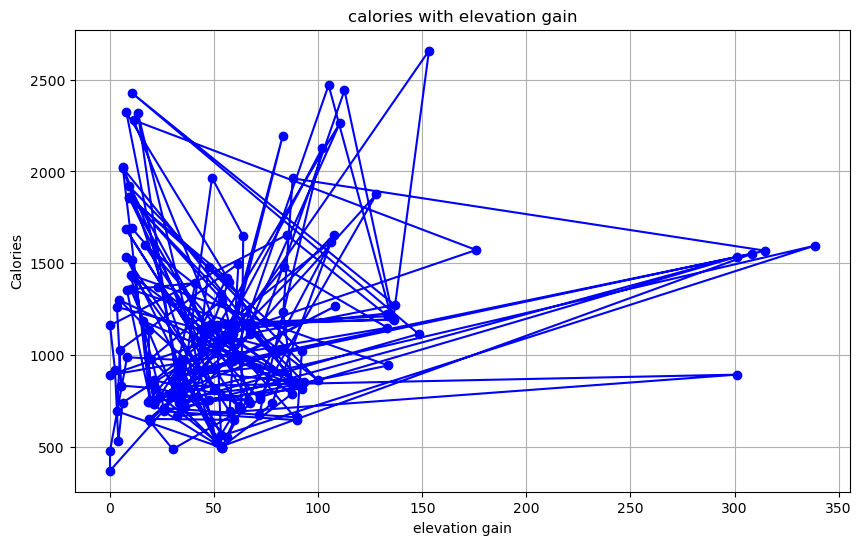

In [37]:
import matplotlib.pyplot as plt

# Choose the variable to represent time or distance
# For example, let's use 'Distance'
x = df_run_clean['Elevation Gain']  
# Choose the power variable to plot
# For example, let's use 'Maximum Power 1.0 hr'
y = df_run_clean['Calories']  # Assuming 'Maximum Power 1.0 hr' is the column name representing power

# Plot the power curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue', marker='o', linestyle='-')
plt.title('calories with elevation gain')
plt.xlabel('elevation gain')
plt.ylabel('Calories')
plt.grid(True)
plt.show()

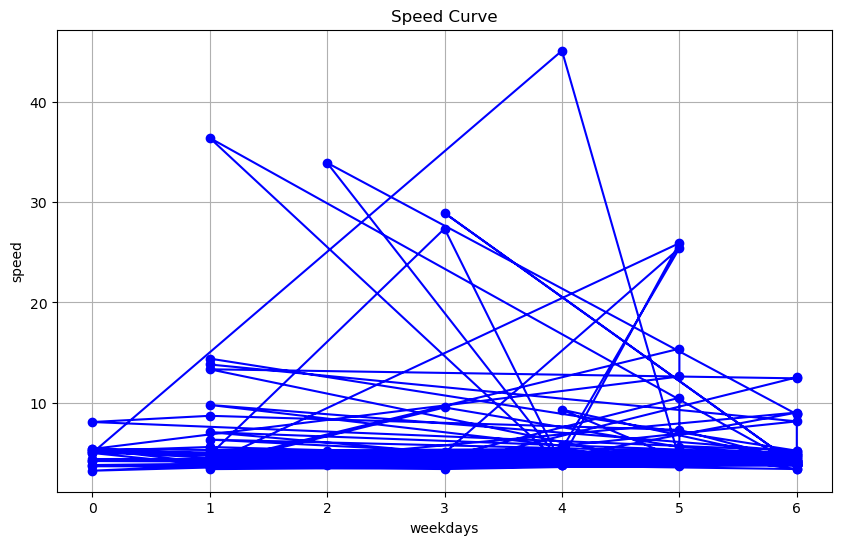

In [38]:
import matplotlib.pyplot as plt

# Choose the variable to represent time or distance
# For example, let's use 'Distance'
x = df_run_clean['Weekday']  
# Choose the power variable to plot
# For example, let's use 'Maximum Power 1.0 hr'
y = df_run_clean['Max Speed']  # Assuming 'Maximum Power 1.0 hr' is the column name representing power

# Plot the power curve
plt.figure(figsize=(10, 6))
plt.plot(x, y, color='blue', marker='o', linestyle='-')
plt.title('Speed Curve')
plt.xlabel('weekdays')
plt.ylabel('speed')
plt.grid(True)
plt.show()

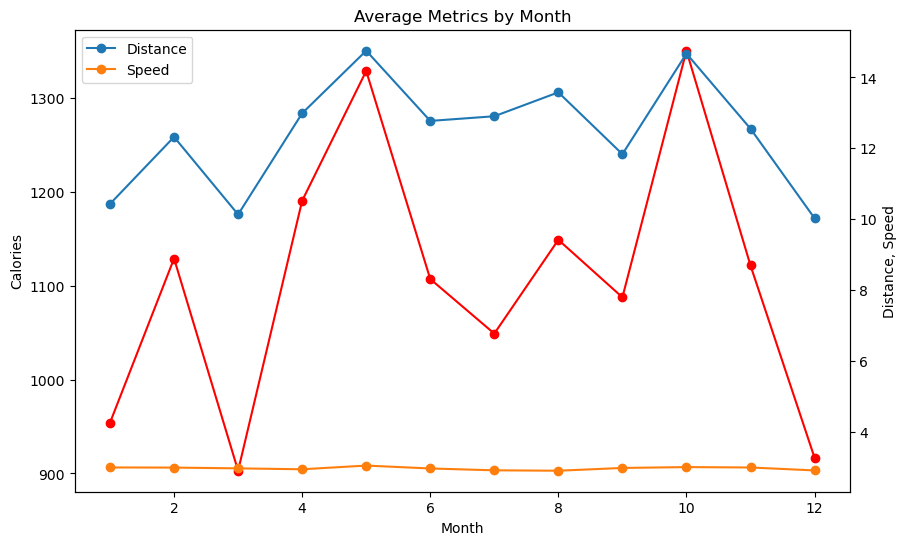

In [39]:
# Average Metrics by Month with Speed and Distance on the Right Axis
plt.figure(figsize=(10, 6))
ax = avg_metrics_month['Calories'].plot(color='red', marker='o')
plt.ylabel('Calories')

# Twin axis for speed and distance
ax2 = ax.twinx()
avg_metrics_month[['Distance', 'Average Speed']].plot(ax=ax2, marker='o')

plt.title("Average Metrics by Month")
plt.xlabel("Month")
ax.set_ylabel('Calories')
ax2.set_ylabel('Distance, Speed')
plt.legend(['Distance', 'Speed'], loc='upper left')
plt.show()

In [40]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Assuming you have your running data in a pandas DataFrame
# Let's say your DataFrame is named 'running_data' and it contains columns: 'distance', 'elevation_gain', 'pace_curve', and 'running_time'

# Split the dataset into features (X) and target variable (y)
X = df_run_clean[['Distance', 'Elevation Gain', 'Average Speed', 'Max Speed']]
y = df_run_clean['Moving Time']

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the SVM model
svm_model = SVR(kernel='rbf')  # Radial Basis Function (RBF) kernel is commonly used for SVM regression
svm_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = svm_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Performance Metrics of SVR :")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared Score (R2): {r2:.2f}")



Performance Metrics of SVR :
Mean Squared Error (MSE): 3149027.63
Mean Absolute Error (MAE): 1315.63
R-squared Score (R2): -0.06


In [41]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Assuming you have your running data in a pandas DataFrame
# Let's say your DataFrame is named 'running_data' and it contains columns: 'distance', 'elevation_gain', 'pace_curve', and 'running_time'

# Split the dataset into features (X) and target variable (y)
X = df_run_clean[['Distance', 'Elevation Gain', 'Average Speed', 'Max Speed']]  # Features
y = df_run_clean['Moving Time']  # Target variable

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train the Linear Regression model
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred = lr_model.predict(X_test_scaled)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Performance Metrics of Linear Regession:")
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared Score (R2): {r2:.2f}")


Performance Metrics of Linear Regession:
Mean Squared Error (MSE): 5369.49
Mean Absolute Error (MAE): 44.56
R-squared Score (R2): 1.00


In [42]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)  # You can adjust the number of trees (n_estimators) as needed
rf_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_rf = rf_model.predict(X_test_scaled)

# Evaluate the Random Forest model
mse_rf = mean_squared_error(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)
print("Random Forest Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse_rf:.2f}")
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")
print(f"R-squared Score (R2): {r2_rf:.2f}")


Random Forest Performance Metrics:
Mean Squared Error (MSE): 70130.53
Mean Absolute Error (MAE): 150.26
R-squared Score (R2): 0.98


In [43]:
from sklearn.ensemble import GradientBoostingRegressor

# Train the Gradient Boosting model
gb_model = GradientBoostingRegressor(random_state=42)  
gb_model.fit(X_train_scaled, y_train)

# Make predictions on the test set
y_pred_gb = gb_model.predict(X_test_scaled)

# Evaluate the Gradient Boosting model
mse_gb = mean_squared_error(y_test, y_pred_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)
print("Gradient Boosting Performance Metrics:")
print(f"Mean Squared Error (MSE): {mse_gb:.2f}")
print(f"Mean Absolute Error (MAE): {mae_gb:.2f}")
print(f"R-squared Score (R2): {r2_gb:.2f}")


Gradient Boosting Performance Metrics:
Mean Squared Error (MSE): 33252.36
Mean Absolute Error (MAE): 110.08
R-squared Score (R2): 0.99
